In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = "svg"
from pymc3 import *
import arviz as az

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Exercises**

1.1 Suppose we have 200 data points generated from the followig model
\begin{equation}
y = 4x_1 - 2x_2 + 4x_1 x_2 + \epsilon
\end{equation}
where $\sigma = 0.2$, $x_1$ is continous predictor which falls between $-1$ and $1$, and $x_2$ is a binary predictor. You can assume $x_2=0$ for about half the data points. **Without actually fitting a regression**, describe in detail what the residual plot would look like if we fit this data to a linear regression model with no interaction term.

1.2 Consider the following residual plots. Assume that the residuals have been generated by fitting data to a regression model with two predictors. For each one, explain why or why not the plot suggests that there is something wrong with the linear regression modeling assumptions. 



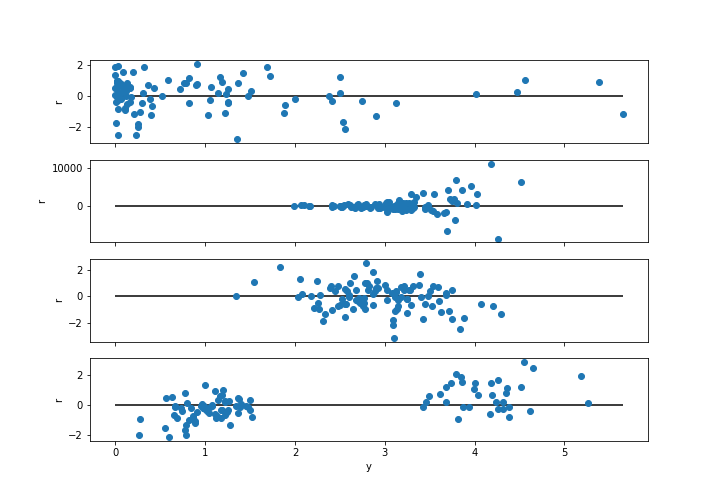

#1.1

Text(0.5, 0, 'x1')

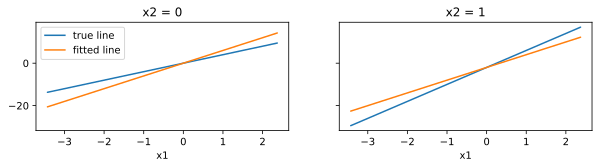

In [ ]:
# 1.1

# defines our x's and the linear regression line
x1 = np.random.normal(0,1,200)
x2 = np.array([np.random.choice([0,1],p = [0.5,0.5]) for k in range(200)])
y = 4*x1 - 2*x2 + 4*x1*x2 + np.random.normal(0,2,len(x1))

# define our predicted fitted values
beta0_fit=0
beta1_fit=6
beta2_fit=-2

# plots the fitted line when x2=0 against the true line
fig,axs = plt.subplots(figsize=(10,2),ncols=2,sharex=True,sharey=True)
ax = axs[0]
ax.set_title("x2 = 0")
ax.plot(x1,4*x1,label = "true line")
ax.plot(x1,beta0_fit + x1*beta1_fit,label="fitted line")
ax.set_xlabel("x1")
ax.legend()

# plots the fitted line when x2=1 against the true line
ax = axs[1]
ax.set_title("x2 = 1")
ax.plot(x1,8*x1-2,label = "true line")
ax.plot(x1,beta0_fit + x1*beta1_fit + beta2_fit*1,label="fitted line")
ax.set_xlabel("x1")


From our plots of the true lines vs our predicted fitted lines, we can see that the plot of the residuals will have a "X" shape. 

When x2=0, for roughly the first half of the data, the true line returns a greater value than the fitted line, denoting positive residuals. At the point (0,0), the lines cross, giving a residual of 0. Then for the second half of the data, the fitted line returns a greater value, denoting negative residuals. Thus, if you were to draw a fitted line for the residuals, you would get a negatively sloped line that starts positive and crosses the x axis when y=0. 

When x2=1, the exact opposite is true. For the first half, the fitted line returns a greater value. Then, they intersect at the point (0,0) like the other graph. The second half of the data shows that the true line returns a greater value. Therefore, the fitted line of the residuals would be a positively sloped line that starts negative and crosses the x axis at y=0. Together, these plots form a "X" shape.

#1.2

a) The variation is pretty constant as y changes. The concentration of points around 0 just means that most of our data is concentrated around 0 and we have less points as y increases. Each residual seems to be independent from each other, none are biased towards positive or negative numbers, and are roughly consistent with a normal distribution.


b) This residual plot shows that our model is likely not good for our data set. As the y value increases, the variation around the fitted line is changing, as seen with the fanning outward shape. Thus, the residuals do not seem to be independent from each other (follow a pattern).

c) Since there is no pattern in the residual plot, is not biased towards positive or negative numbers, and has a roughly normal distribution, it is likely that our model works pretty well for our data set.

d) This residual plot shows that our model is likely not good for our data set. The residuals around y=1 are more likely to be negative and the residuals around y=4  are more likely to be positive. Thus, our model is likely not good, as the residuals are biased towards positive or negative numbers, are not independent from each other, and are not normally distributed.

**Exercises**



2.1 Generate simulated data from a linear regression model **with one predictor** for many different values of $a$, $b$ and $\sigma$. You decide how you generate these values. For each one compute $R^2$ and $\rho$ (the correlation coefficient). Then make a plot of $R^2$ vs. $\rho$. What is the relationship between $R^2$ and $\rho$?

To get started on this problem, you can use the following template code


```
rhos = []
R2 = []
for k in range(1000):

  # GENERATE RANDOM SLOPE AND INTERCEPT
  # AND SIMULATE DATA FROM LINEAR REGRESSION MODEL
  # COMPUTE R^2 and rho
rhos = np.array(rhos)
R2 = np.array(R2)

# MAKE A PLOT
# TRY COMPARING YOUR PLOT TO PLOTS DO DIFFERENT FUNCTIONS

```






2.2 (UNGRADED) Try excercise 2.1 agian, but this time add another predictor to the model. That is, generate data from a linear regression model with two predictors. Then plot $R^2$ vs. the slope you get after standardizing the predictors and the response variable. However, make the coefficient of that predictor $0$ ($\beta_2 =0$) in all your simulations. What do you notice? Can you explain why the plot looks different. Try adding more and more predictors to the model, but make their coefficients zero. What happens? 

2.3 (UNGRADED) you can actually prove the relation that you should have discovered in the previous problem. You can easily find the proof online. What is more interesting is understanding intuitively **why** this relationship holds. Using the interpretations of $R^2$ and $\rho$ (not the mathematical definitions), can you provide and intuitive explanation for this relationship?

##2.1

Text(0, 0.5, 'r2')

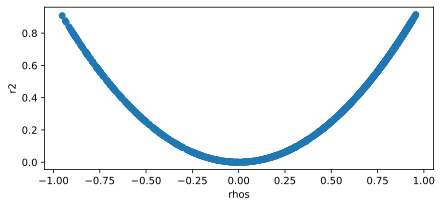

In [ ]:
rhos = []
rhos2=[]
R2 = []
x = np.random.normal(2,1,1000)

for k in range(1000):
  a = np.random.normal(5, 10) # generate random slopes
  b = np.random.normal(0, 25) # generates random intercepts
  sigma = np.random.normal(0, 10, len(x)) # generates random noise

  y = a*x + b + sigma # makes a model with the random parameters

  z_x = (x - np.mean(x))/np.std(x) # standardizes both
  z_y = (y - np.mean(y))/np.std(y)
  model = sm.OLS(z_y,sm.add_constant(z_x))
  results = model.fit()

  b, rho = results.params # gets the rho
  r2=results.rsquared # gets the r2 too

  rhos.append(rho)
  R2.append(r2)

  # GENERATE RANDOM SLOPE AND INTERCEPT
  # AND SIMULATE DATA FROM LINEAR REGRESSION MODEL
  # COMPUTE R^2 and rho
rhos = np.array(rhos)
R2 = np.array(R2)

fig,ax = plt.subplots(figsize=(7,3))
ax.plot(rhos, R2,"o")
ax.set_xlabel("rho")
ax.set_ylabel("r2")

# MAKE A PLOT
# TRY COMPARING YOUR PLOT TO PLOTS DO DIFFERENT FUNCTIONS


The relationship between rho and R2 is a quadratic relationship. The lowest R2 value is at rho = 0. This means that variation increases as rho goes farther from 0.

**Exercises**

3.1 Suppose we are trying to understand whether mask mandates at universities help prevent the spread of the seasonal flu. Let $y$ denote the number of flu cases per 1000 students after $10$ weeks of classes. Universities are catagorized as either using hybrid learning, remote or in-person model, whether they are rural or in a city, and whether they have a mask mandate. 
We use the model
\begin{equation}
\ln y = \beta_0 + \beta_1 x_{\rm mask} + \beta_2 x_{\rm city} + \beta_3 x_{\rm remote} + \beta_4 x_{\rm hybrid}
\end{equation}
The predictor variables are all indicator variables, for example, $x_{\rm remote}=1$ if the university if using a remote learning model. What is the interpretation of $x_{\rm hybrid}$? 

3.2
If we fit the model using statsmodels and find $\beta_1 = -0.03$, explain what this suggests about the effects of mask mandates of seasonal flu. Be clear about what this tells us about the **quantitative** association between how mask mandates and flu cases. 



##3.1

Assuming that all other variables are constant, $\beta_4$ is the change in the **log** **number** of flu cases after 10 weeks of classes due to using a hybrid model or not. In other words, using a hybrid model or not would change the number of flu cases by
$e^{\beta_4}$


## 3.2

In [ ]:
# 3.2

np.exp(-0.03)

0.9704455335485082

If we find that ${\beta_3}$ = -.03, then this means that when all other variables are held constant, there are 3% less flu cases after 10 days if there is a mask mandate.